# **Machine Learning based Holiday trip planner**

---



## **Project Description:**

 *   Idea behind this project is to develop a Ml based holiday trip planner for creating complete plan of my upcoming trip without any kind of human help.In this project I have used the datasets available on the internet especially on sites like "www.kaggle.com" to predict the best route and price of transportation and also predicted the best hotels at that particular location .
 *   For this project I have used various libraries like sklearn,which contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.Also I have used  plotly Python library which is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.Along with that I have also used other libraries like pandas,numpy,nltk etc for other basic operations. 
 *   To make it more interactive or user friendly we can colaborate this Ml models with the other website/application platforms like Flask,etc.



## **Objectives:**






Following are some of the main objectives of Ml based holiday trip  planner 
*   To predict the best route and prices of the transportation from available  datasets to reach the desired destination.
*   To predict best hotels with prices based on the previous available data
*   To select suitable Ml models for the above predictions
*   To provide the best and suitable trip plan based on the previous plans selected by the customers/users.  

## **Data Source**



1.   [Data_Train.xlsx](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh?select=Data_Train.xlsx)
2.  [Test_set.xlsx](https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh?select=Test_set.xlsx) 
1.[Hotels.csv](https://www.kaggle.com/bimimi/hotel-recommender-system?select=Seattle_Hotels.csv)   






## **Import Library**

In [ ]:
# ! pip install chart_studio
# ! pip install pyLDAvis
# ! pip install scikit-learn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import plotly.graph_objs as go
from chart_studio import plotly   #uncomment above installation lines if library was not found
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

#uncomment Top installation lines if library was not found
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold

## **Import Data**

In [ ]:
kfold = StratifiedKFold(n_splits=20)
transport_df = pd.read_excel("/content/drive/MyDrive/Learning Machine /Dataset/Data_Train.xlsx")
test_data = pd.read_excel(r"/content/drive/MyDrive/Learning Machine /Dataset/Test_set.xlsx")
hoteltrain_df = pd.read_csv('/content/drive/MyDrive/Learning Machine /Dataset/Seattle_Hotels.csv', encoding="latin-1")

# **Describing Training Dataset**

##Describing transportation training data

In [ ]:
transport_df.head(10)
#print(transport_df.head(10)) #uncomment if required 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [ ]:
transport_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##Describing Hotels data

In [ ]:
hoteltrain_df.head(10)
#print(hoteltrain_df.head(10)) # uncomment if required

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...
5,The Paramount Hotel Seattle,"724 Pine Street, Seattle Central Business Dist...","More than just a hotel, The Paramount Hotel Se..."
6,Hilton Seattle,"1301 6th Avenue Seattle, Washington, 98101-231...",Enjoy our central location in the heart of dow...
7,Motif Seattle,"1415 Fifth Ave Seattle, WA 98101",A downtown Seattle destination hotel just step...
8,Warwick Seattle,"401 Lenora Street Seattle, Washington 98121","In a city known for setting trends, Warwick Se..."
9,Four Seasons Hotel Seattle,"99 Union St, Seattle, WA 98101","Surrounded by snow-capped mountain peaks, deep..."


In [ ]:
def print_description(index):
  example =hoteltrain_df[hoteltrain_df.index == index][['desc', 'name']].values[0]
  if len(example) > 0:
    print(example[0])
    print('Name:', example[1])
print_description(10)
#print_description(100)

Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle


In [ ]:
hoteltrain_df['word_count'] = hoteltrain_df['desc'].apply(lambda x: len(str(x).split()))
desc_lengths = list(hoteltrain_df['word_count'])

print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))
hoteltrain_df['word_count'].iplot(
    kind='hist',
    bins = 50,
    linecolor='black',
    xTitle='word count',
    yTitle='count',
    title='Word Count Distribution in Hotel Description')

Number of descriptions: 152 
Average word count 156.94736842105263 
Minimum word count 16 
Maximum word count 494


# **Preprocessing of Training data**

##Preprocessing of Transportation data

In [ ]:
# Checking if there are any missing values in Training Dataset
transport_df.dropna(inplace = True)
transport_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# After looking at the dataset, there are 4 columns with date-time variables and we need to apply featrure engineering to those columns
#first we take the duration column
transport_df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
5m           1
35h 20m      1
27h 55m      1
28h 30m      1
30h 15m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
transport_df["Dep_hour"] = pd.to_datetime(transport_df["Dep_Time"]).dt.hour
transport_df.drop(["Dep_Time"], axis = 1, inplace = True)
transport_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16


In [ ]:
#Now we consider date of journey
transport_df["Journey_day"] = pd.to_datetime(transport_df.Date_of_Journey, format="%d/%m/%Y").dt.day
transport_df["Journey_month"] = pd.to_datetime(transport_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
transport_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
transport_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
duration = list(transport_df["Duration"]) # Converting 'Duration' column into a list
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

transport_df["Duration_hours"] = duration_hours
transport_df["Duration_mins"] = duration_mins
transport_df.drop(["Duration"], axis = 1, inplace = True)

transport_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,16,4,45


In [ ]:
transport_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# transport_df[transport_df['Total_Stops'].isnull()]

## Preprocessing of Hotels data

In [ ]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
hoteltrain_df['desc_clean'] = hoteltrain_df['desc'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<input>:3: DeprecationWarning:

invalid escape sequence \[

<ipython-input-73-3690aba80128>:3: DeprecationWarning:

invalid escape sequence \[



True

# **Data Visualization of Training dataset**

## Visualization of Transportation data

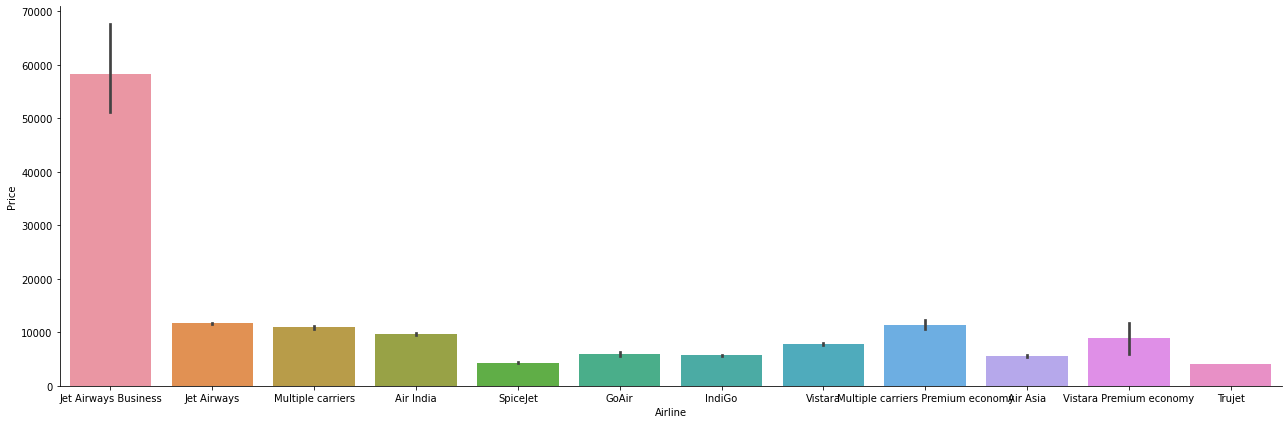

In [ ]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = transport_df.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 3)
plt.show()

In [ ]:
Airline = transport_df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
transport_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

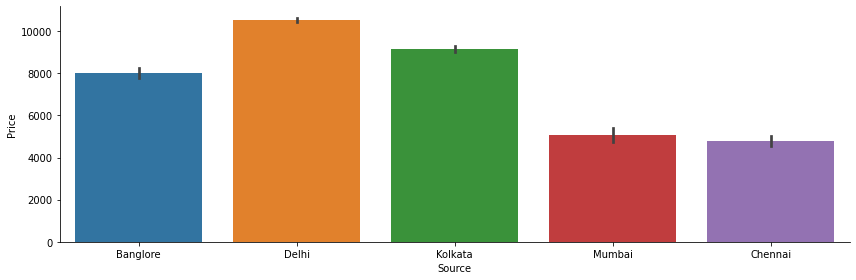

In [ ]:
sns.catplot(y = "Price", x = "Source", data = transport_df.sort_values("Price", ascending = False), kind="bar", height = 4, aspect = 3)
plt.show()

In [ ]:

Source = transport_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
transport_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = transport_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# Route=transport_df[["Route"]]
# Route=transport_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True) #uncomment to get routes available separetly
transport_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
transport_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
transport_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,No info,3897,24,3,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,5,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882,9,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,No info,6218,12,5,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,No info,13302,1,3,16,4,45


In [ ]:
transport_df = pd.concat([transport_df, Airline, Source, Destination], axis = 1)
transport_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,0,No info,3897,24,3,22,2,50,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,5,5,7,25,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882,9,6,9,19,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1,No info,6218,12,5,18,5,25,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1,No info,13302,1,3,16,4,45,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
transport_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
transport_df.head()

,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,01:10 22 Mar,0,No info,3897,24,3,22,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,5,5,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882,9,6,9,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,23:30,1,No info,6218,12,5,18,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,21:35,1,No info,13302,1,3,16,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
transport_df.head()

,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,01:10 22 Mar,0,No info,3897,24,3,22,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,13:15,2,No info,7662,1,5,5,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,04:25 10 Jun,2,No info,13882,9,6,9,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,23:30,1,No info,6218,12,5,18,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,21:35,1,No info,13302,1,3,16,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
transport_df.shape

(10682, 30)

##Visualization of Hotel data

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(hoteltrain_df['desc'], 20)
hoteltrain_df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
hoteltrain_df2.groupby('desc').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Top 20 words in hotel description after removing stop words')
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(hoteltrain_df['desc'], 20)
hoteltrain_df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
hoteltrain_df2.groupby('desc').sum()['count'].sort_values().iplot(kind='barh', yTitle='Count', linecolor='black', title='Top 20 words in hotel description after removing stop words')

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(hoteltrain_df['desc'], 20)
hoteltrain_df3 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
hoteltrain_df3.groupby('desc').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in hotel description before removing stop words')


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(hoteltrain_df['desc'], 20)
hoteltrain_df5 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
hoteltrain_df5.groupby('desc').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in hotel description before removing stop words')
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(hoteltrain_df['desc'], 20)
hoteltrain_df6 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
hoteltrain_df6.groupby('desc').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in hotel description after removing stop words')

# **Describing test dataset**

In [ ]:
test_data = pd.read_excel(r"/content/drive/MyDrive/Learning Machine /Dataset/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# **Data preprocessing of Test data**

In [ ]:
print('Training dataset shape:', transport_df.shape)
print('Test dataset shape:', test_data.shape)
test_data.isnull().sum()
#First we consider Duration column
test_data["Duration"].value_counts()
duration_test = list(test_data["Duration"])
duration_test;


for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))
duration_test;
test_data['Duration_hrs'] = duration_hours
test_data['Duration_hrs']

test_data['Duration_mins'] = duration_mins
test_data['Duration_mins']



Training dataset shape: (10682, 50)
Test dataset shape: (2671, 10)


0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_mins, Length: 2671, dtype: int64

In [ ]:
test_data.drop('Duration', axis=1, inplace=True)
test_data['Day_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Month_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data.drop('Date_of_Journey', axis = 1, inplace = True)

test_data['Dep_hr'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis = 1, inplace = True)

test_data['Arrival_hr'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time', axis = 1, inplace = True)
print('Test dataset shape:', test_data.shape)

Test dataset shape: (2671, 14)


In [ ]:
test= pd.concat([test_data, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

(10682, 27)


,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Duration_hrs,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,10.0,55.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,12/05/2019,06:20,10:20,4h,1,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,23.0,45.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,13.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
transport_df.shape

(10682, 50)

In [ ]:
test.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Duration_hrs', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
transport_df.columns

Index(['Route', 'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_C

In [ ]:
# price=transport_df.Price
# transport_df.drop('Price', axis=1, inplace=True)
# data_df=data_df.join(price)
# data_df.head()

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
X = transport_df.loc[:,['Total_Stops','Price','Dep_hour', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [ ]:
X.head()

,Total_Stops,Price,Dep_hour,Duration_hours,Duration_mins,Airline_Air India,Airline_Air India,Airline_GoAir,Airline_GoAir,Airline_IndiGo,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_SpiceJet,Airline_Trujet,Airline_Trujet,Airline_Vistara,Airline_Vistara,Airline_Vistara Premium economy,Airline_Vistara Premium economy,Source_Chennai,Source_Chennai,Source_Delhi,Source_Delhi,Source_Kolkata,Source_Kolkata,Source_Mumbai,Source_Mumbai,Destination_Cochin,Destination_Cochin,Destination_Delhi,Destination_Delhi,Destination_Hyderabad,Destination_Hyderabad,Destination_Kolkata,Destination_Kolkata,Destination_New Delhi,Destination_New Delhi
0,0,3897,22,2,50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2,7662,5,7,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,19,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1,6218,18,5,25,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,13302,16,4,45,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
y = transport_df.iloc[:,4]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [ ]:
# # Finds correlation between Independent and dependent attributes

# plt.figure(figsize = (18,18))
# sns.heatmap(transport_df.corr(), annot = True, cmap = "RdYlGn")

# plt.show()

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

[1.42517930e-01 6.32819731e-01 2.47921068e-04 5.97669442e-02
 4.65870039e-04 1.21680552e-04 1.45243387e-03 5.47239494e-05
 8.41961354e-05 3.05239038e-03 2.48946177e-03 4.96808848e-02
 4.78461432e-02 2.04586893e-02 1.24955806e-02 1.73190892e-03
 1.67575385e-03 8.33234910e-08 2.44750127e-08 7.59840319e-05
 2.17152726e-04 3.15401356e-08 4.81079670e-08 7.73316247e-05
 1.08505404e-04 9.88180316e-08 1.12971918e-07 7.61990561e-06
 9.01656166e-06 3.09122846e-03 2.30649120e-03 2.87245711e-04
 2.77695213e-04 6.77747895e-04 8.27168139e-04 3.27270718e-03
 2.49533895e-03 2.58796660e-03 1.93899827e-03 2.60232747e-04
 2.91650819e-04 1.04818864e-05 7.27571657e-06 1.67135227e-03
 2.53816600e-03]


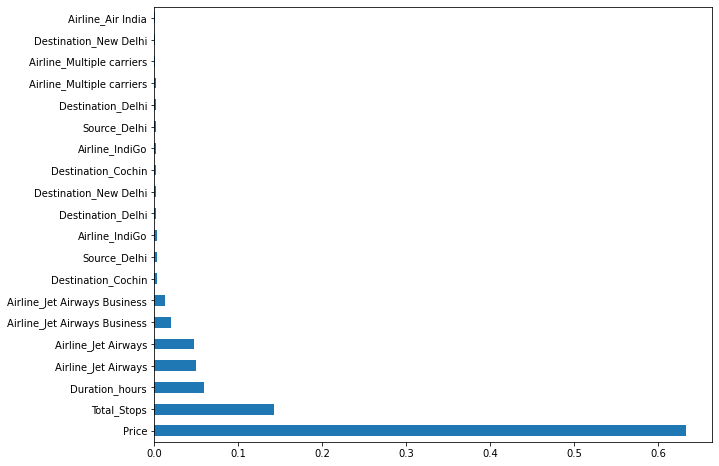

In [ ]:
#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

##**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#**Training Models for predictions**

##**Transportation**

We are using four types of Ml methods out of which we are selecting the best accuracy giving method based on specific datasets

###**Using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

print("Linear Regression Score on Training set is",lin_reg.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lin_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lin_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mse(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Linear Regression Score on Training set is 1.0
Linear Regression Score on Test Set is 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  UserWarning,


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
Mean Absolute Error: 3.2945243268246316e-12
Mean Squared Error: 1.999129485097156e-23
RMSE: 4.471162583822194e-12
The r2_score is 1.0


###**Decision Tree Regression**

In [ ]:
#Decision Tree Regressor
# from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mse(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.9990359825567429


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  UserWarning,


[0.99998954 0.99998214 0.99995213 0.99999492 0.99996928 0.99998253
 0.97309844 0.99648739 0.9999945  0.99999753 0.99999336 0.99998854
 0.99974333 0.9999812  0.99998106 0.92505184 0.99996683 0.98151178
 0.99998228 0.99999141]
Accuracy: 99.38 %
Standard Deviation: 1.72 %
Mean Absolute Error: 7.033224145999064
Mean Squared Error: 20786.198408984557
RMSE: 144.17419467083752
The r2_score is 0.9990359825567429


###**Fitting model using Random Forest**

Random Forest Score on Training set is 0.9959296025189194
Random Forest Score on Test Set is 0.9997010871339944


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  UserWarning,


[0.99996764 0.99998997 0.99993875 0.99998103 0.99999196 0.99998932
 0.99488413 0.98780822 0.99998895 0.99999091 0.99997869 0.99997936
 0.99865649 0.9999417  0.99953331 0.99769157 0.99986423 0.94907776
 0.99960307 0.99958465]
Accuracy: 99.63 %
Standard Deviation: 1.12 %
Mean Absolute Error: 7.58192584746449
Mean Squared Error: 6445.176052829778
RMSE: 80.28185382033588
The r2_score is 0.9997010871339944


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


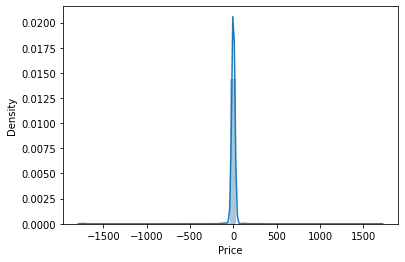

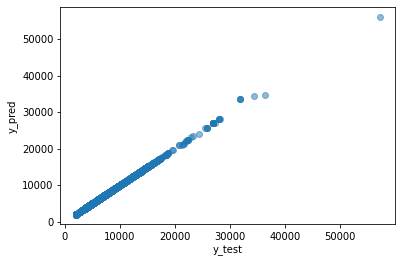

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)
print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy
rf_reg.score(X_test, y_test)
accuracies = cross_val_score(rf_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mse(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7.576835798699188
MSE: 6424.655028277507
RMSE: 80.15394580603943


###**Randomized Search CV**

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=30,
                                                   min_samples_leaf=2,
                                                   min_samples_split=15,
                                                   n_estimators=400),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


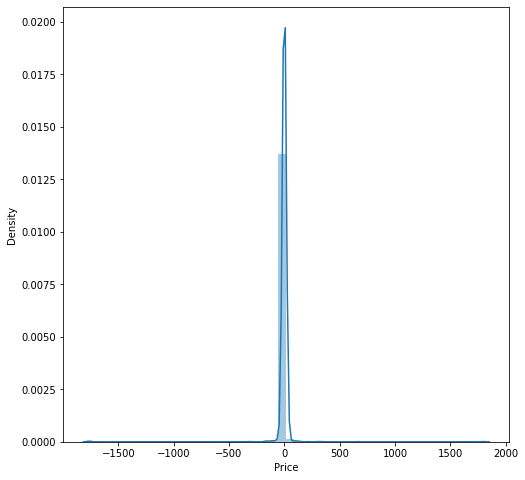

In [ ]:
rf_random.best_params_
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

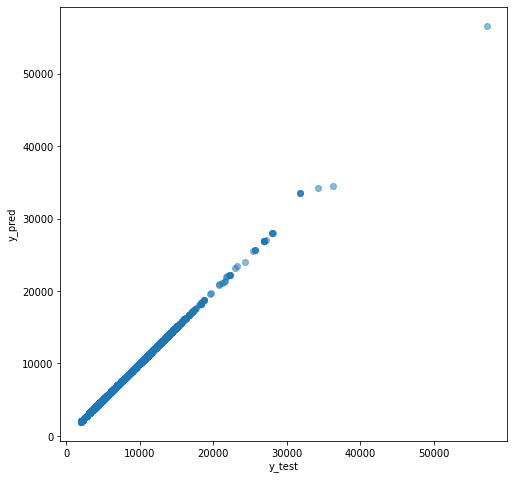

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

##**Hotels**

At first we are creating TfidfVectorizer object and then we generate matrix of word vectors for using it into predictive modelling and at the last we compute the cosine similarity matrix for performing various predictions/recommendations.

In [ ]:
# hoteltrain_df.set_index('name', inplace = True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(hoteltrain_df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(hoteltrain_df.index)
indices[:50]

0                        Hilton Garden Seattle Downtown
1                                Sheraton Grand Seattle
2                         Crowne Plaza Seattle Downtown
3                         Kimpton Hotel Monaco Seattle 
4                                    The Westin Seattle
5                           The Paramount Hotel Seattle
6                                        Hilton Seattle
7                                         Motif Seattle
8                                       Warwick Seattle
9                            Four Seasons Hotel Seattle
10                                            W Seattle
11                                   Gand Hyatt Seattle
12                                 Kimpton Alexis Hotel
13                                            Hotel Max
14                                    Ace Hotel Seattle
15                          Seattle Marriott Waterfront
16                          The Edgewater Hotel Seattle
17                   SpringHill Suites Seattle D

#**Saving & Predicting the Prices for the Holiday Trips**  

At this stage we predict and recommend the best tarvel plan and hotels to the customer

##**Predicting the prices of Transportation(Airway)** 

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)
model = open('rf_reg.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.9997010871339944

##**Hotels Predictions/recommendations** 

In [ ]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(hoteltrain_df.index)[i])
        
    return recommended_hotels

In [ ]:
recommendations('Hilton Seattle Airport & Conference Center')

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']